#Import Libraries

In [1]:
%tensorflow_version 2.x

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pathlib

from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras.layers import MaxPool2D, MaxPool1D
from tensorflow.keras.layers import Dropout, BatchNormalization

from google.colab import drive

print("Module Loaded.")
print("TensorFlow Version :{}".format(tf.__version__))
print("NumPy Version :{}".format(np.__version__))
print("Matplotlib Version :{}".format(plt.matplotlib.__version__))

TensorFlow 2.x selected.
Module Loaded.
TensorFlow Version :2.1.0-rc1
NumPy Version :1.17.4
Matplotlib Version :3.1.2


In [2]:
drive.mount('/content/drive')

data_path = pathlib.Path('/content/drive/Shared drives/scsa_2019_b/Project_Ai-KEA/data_resize/furniture')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
class_name = np.array([item.name for item in data_path.glob('*')])
print(class_name)

['bookshelves' 'fireplace' 'floor lamp' 'chair' 'entertainment center'
 'dressing table' 'bed' 'curtain' 'sofa' 'table']


# Prepare Data

- **Unzip Data**

In [4]:
import os

cwd = os.getcwd()
print(cwd)

!unzip /content/drive/Shared\ drives/scsa_2019_b/Project_Ai-KEA/data_resize/furniture.zip -d /content/furniture

/content
Archive:  /content/drive/Shared drives/scsa_2019_b/Project_Ai-KEA/data_resize/furniture.zip
   creating: /content/furniture/bed/
  inflating: /content/furniture/bed/bed (1).jpg  
  inflating: /content/furniture/bed/bed (10).jpg  
  inflating: /content/furniture/bed/bed (100).jpg  
  inflating: /content/furniture/bed/bed (1000).jpg  
  inflating: /content/furniture/bed/bed (1001).jpg  
  inflating: /content/furniture/bed/bed (1002).jpg  
  inflating: /content/furniture/bed/bed (1003).jpg  
  inflating: /content/furniture/bed/bed (1004).jpg  
  inflating: /content/furniture/bed/bed (1005).jpg  
  inflating: /content/furniture/bed/bed (1006).jpg  
  inflating: /content/furniture/bed/bed (1007).jpg  
  inflating: /content/furniture/bed/bed (1008).jpg  
  inflating: /content/furniture/bed/bed (1009).jpg  
  inflating: /content/furniture/bed/bed (101).jpg  
  inflating: /content/furniture/bed/bed (1010).jpg  
  inflating: /content/furniture/bed/bed (1011).jpg  
  inflating: /content

In [5]:
data_path = pathlib.Path('/content/furniture')
class_name = np.array([item.name for item in data_path.glob('*')])
print(class_name)

['bed' 'sofa' 'fireplace' 'chair' 'floor lamp' 'dressing table' 'curtain'
 'table' 'entertainment center' 'bookshelves']


# Resize Image

In [0]:
# from PIL import Image

# for j in class_name[1:4]:
#     image = pathlib.Path('/content/drive/Shared drives/scsa_2019_b/Project_Ai-KEA/data/furniture/'+j)
#     image = list(image.glob('*.jpg'))
#     for i in range(len(image)):
#         im = Image.open(str(image[i])).convert('RGB')
#         resize_image = im.resize((im.size[0]//2,im.size[1]//2))
#         resize_image.save('/content/drive/Shared drives/scsa_2019_b/Project_Ai-KEA/data_resize/furniture/{0}/{1}{2:03d}.jpg'.format(j,j,i))
#         print(j, i)

In [0]:
data_path = pathlib.Path('/content/drive/Shared drives/scsa_2019_b/Project_Ai-KEA/data_resize/furniture')

#ImageGenerator

In [0]:
img_size =  224
batch_n = 256

data_path = pathlib.Path('/content/furniture')

In [0]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                #horizontal_flip=True, 
                                #vertical_flip=True,
                                #rotation_range=30,
                                zoom_range=0.1,
                                brightness_range=[0.8,1.2],
                                validation_split=0.2,
                                rescale=1./255)

In [8]:
train_data_generate = image_generator.flow_from_directory(
                        directory=str(data_path),
                        batch_size=batch_n,
                        shuffle=True,
                        target_size=(img_size, img_size),
                        classes = list(class_name),
                        subset='training')
test_data_generate = image_generator.flow_from_directory(
                        directory=str(data_path),
                        batch_size=batch_n,
                        shuffle=True,
                        target_size=(img_size, img_size),
                        classes = list(class_name),
                        subset='validation')

Found 12559 images belonging to 10 classes.
Found 3135 images belonging to 10 classes.


#Load Inception

import model

In [9]:
import tensorflow.keras.applications.inception_v3 as incep

model_incep = incep.InceptionV3(
    weights="imagenet", 
    #include_top=False,    # dense layer 이 후는 제외
    input_tensor=tf.keras.layers.Input(shape=(img_size, img_size, 3))
    #input_tensor=keras.layers.Input(shape=(49, 49, 3))
)

model_incep.summary()

96116736/96112376 [==============================] - 4s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________

##fine tuning

In [0]:
epoch_n = 100

make ai-kea model

In [11]:
#inputs = model_incep.inputs
#print(inputs[0])
inputs = model_incep.get_layer('mixed7').output
x = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same', name='conv_feat')(inputs) 
x = tf.keras.layers.Flatten()(x)
outputs = tf.keras.layers.Dense(10, activation='softmax')(x) 

aikea_model = tf.keras.Model(inputs=model_incep.inputs, outputs=outputs, name='grad_model')

aikea_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

aikea_model.summary()

Model: "grad_model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_________________________________________________________________________________________

In [12]:
aikea_model.fit_generator(
    train_data_generate,
    epochs = epoch_n,
    validation_data = test_data_generate
)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 50 steps, validate for 13 steps
Epoch 1/100
50/50 [==============================] - 223s 4s/step - loss: 0.7888 - accuracy: 0.7595 - val_loss: 2.5007 - val_accuracy: 0.2067
Epoch 2/100
50/50 [==============================] - 220s 4s/step - loss: 0.3452 - accuracy: 0.8952 - val_loss: 2.2827 - val_accuracy: 0.4440
Epoch 3/100
50/50 [==============================] - 219s 4s/step - loss: 0.2567 - accuracy: 0.9220 - val_loss: 0.9858 - val_accuracy: 0.6868
Epoch 4/100
50/50 [==============================] - 219s 4s/step - loss: 0.2041 - accuracy: 0.9344 - val_loss: 0.9479 - val_accuracy: 0.7432
Epoch 5/100
50/50 [==============================] - 218s 4s/step - loss: 0.1853 - accuracy: 0.9447 - val_loss: 1.3063 - val_accuracy: 0.6695
Epoch 6/100
50/50 [==============================] - 218s 4s/step - loss: 0.2018 - accuracy: 0.9384 - val_loss: 1.0267 - v

KeyboardInterrupt: ignored

In [13]:
grad_model = tf.keras.models.Model(
    [model_incep.inputs],                           # input: vgg16 inputs
    [aikea_model.get_layer('conv_feat').output,  # outputs: vgg16 last conv
     aikea_model.output]                           # softmax out
)
print(grad_model)

# Load Prev Model

In [0]:
save_path = '/content/drive/Shared drives/scsa_2019_b/Project_Ai-KEA/code/model_checkpoint/'

In [0]:
# title format : aikea-{day01}-{sey}
def save_model(date, epoch, model_name, num):
    ai_kea.save(save_path+"aikea_{}_{}_{}_{}.hdf5".format(date, epoch, model_name, num))

In [0]:
def load_models(date, epoch, model_name, num):
  model = tf.keras.models.load_model(save_path+"aikea_{}_{}_{}_{}.hdf5".format(date, epoch, model_name, num))
  return model

In [0]:
prev_ai_kea = load_models('day02', 195, 'GoogLeNet', 'jjy02')

In [0]:
prev_ai_kea.summary()

prev_ai_kea.get_layer('mixed7').output

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 2, 2, 2048)        21802784  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               4194816   
_________________________________________________________________
batch_normalization_94 (Batc (None, 512)               2048      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 26,004,778
Trainable params: 25,969,322
Non-trainable params: 35,456
_________________________________________________________________


ValueError: ignored

# CAM

- make Model Function

In [0]:
import cv2
import matplotlib.patches as patches
from keras.applications.vgg16 import decode_predictions
from tensorflow.keras.preprocessing import image

def buildCAM(img_path, img_alpha, heatmap_alpha): # 0<= alpha <=1

    # load the image with the required shape
    img = image.load_img(img_path, target_size=(img_size, img_size))
    # check image
    plt.imshow(img)
    # convert the image to an array
    img = image.img_to_array(img)         # tf.keras.processing
    # expand dimensions so that it represents a single 'sample'
    img = np.expand_dims(img, axis=0)     # numpy
    # prepare the image (e.g. scale pixel values for the vgg)
    img = incep.preprocess_input(img)     # VGG16.preprocess_input

    grad_model = tf.keras.models.Model(
        [aikea_model.inputs],                           # input: vgg16 inputs
        [aikea_model.get_layer('conv_feat').output,  # outputs: vgg16 last conv
        aikea_model.output]                           # softmax out
    )

    # GradientTape 설정
    with tf.GradientTape() as tape:
        conv_outputs, predict = grad_model(img)   # feature, predict
        class_out = predict[:, np.argmax(predict[0])]    # class     
    print(predict[0])

    # feature map
    output = conv_outputs[0]

    # Get gradient for input image
    grads = tape.gradient(class_out, conv_outputs)[0]

    # check grads' shape
    print('grads', grads.shape, output.shape)

    # Average gradients spatially
    weights = tf.reduce_mean(grads, axis=(0, 1))

    
    # Build a map of filters according to gradients importance
    cam = np.ones(output.shape[0:2], dtype=np.float32)

    for index, w in enumerate(weights):
        print(w)
        cam += w * output[:, :, index]

    # check cam shape
    print('cam', cam.shape, weights.shape)
    print(cam)


    # image read: ndarray type
    img = cv2.imread(img_path)
    # GBR -> RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # cv2는 기본적으로 image를 GBR로 처리

    plt.imshow(img)

    print('img', img.shape, type(img))


    # resize cam
    cam = cv2.resize(cam.numpy(), (img.shape[1], img.shape[0]))
    cam = np.maximum(cam, 0)          # 0 이상의 값만 취함
    # heatmap : minmax normalized one
    heatmap = (cam - cam.min()) / (cam.max() - cam.min())

    # convert heatmap to rgb
    heatmap = np.uint8(255 * heatmap)                       # RGB range (0~255)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)  # apply color map
    heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)      # colormap to RGB
    
    # get heatmap outline
    heatlist = heatmap.tolist()
    t_pos = []
    for i in range(len(heatlist)):
      for j in range(len(heatlist[i])):
        if heatlist[i][j][2]<200: t_pos.append((i, j))

    y_max = max([i[0] for i in t_pos])
    y_min = min([i[0] for i in t_pos])
    x_max = max([i[1] for i in t_pos])
    x_min = min([i[1] for i in t_pos])

    # check heatmap shape
    plt.imshow(heatmap)
    heatmap.shape #(426, 640, 3)

    # blending heatmap: image: 100%, heatmap: 50%
    output_image = cv2.addWeighted(img.astype('uint8'), img_alpha,  # 1: 100%
                                  heatmap, heatmap_alpha,            # 0.5: 50%
                                  0)
    
    
    return predict[0], output_image, y_min, x_min, (y_max-y_min), (x_max-x_min)

In [0]:
img_path = '/content/furniture/floor lamp/floor_lamp (11).jpg'

tf.Tensor(
[1.1462643e-05 5.5147288e-05 3.2052951e-04 3.9162906e-03 9.6913517e-01
 2.5671463e-02 5.8074696e-05 4.1224688e-04 1.6751044e-04 2.5218682e-04], shape=(10,), dtype=float32)
grads (12, 12, 64) (12, 12, 64)
tf.Tensor(1.4003564e-05, shape=(), dtype=float32)
tf.Tensor(0.0002701985, shape=(), dtype=float32)
tf.Tensor(-0.00035922727, shape=(), dtype=float32)
tf.Tensor(-7.842073e-05, shape=(), dtype=float32)
tf.Tensor(-2.1355045e-05, shape=(), dtype=float32)
tf.Tensor(0.00097190775, shape=(), dtype=float32)
tf.Tensor(0.000465608, shape=(), dtype=float32)
tf.Tensor(-9.665699e-05, shape=(), dtype=float32)
tf.Tensor(-6.2571955e-05, shape=(), dtype=float32)
tf.Tensor(-0.00022066876, shape=(), dtype=float32)
tf.Tensor(-0.00096902135, shape=(), dtype=float32)
tf.Tensor(-0.00086475955, shape=(), dtype=float32)
tf.Tensor(0.00038133812, shape=(), dtype=float32)
tf.Tensor(-0.00016864188, shape=(), dtype=float32)
tf.Tensor(0.0001289185, shape=(), dtype=float32)
tf.Tensor(-0.00030786448, shape=

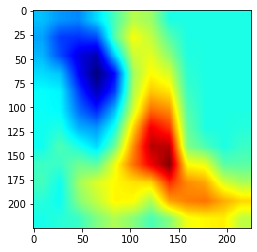

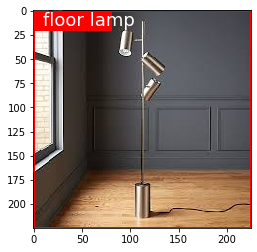

In [70]:
import cv2
import matplotlib.patches as patches
from tensorflow.keras.preprocessing import image

# define Model
pred_list=[]
pred_list, output_image, yy, xx, h, w = buildCAM(img_path, 1, 0)
pred_cls = class_name[np.argmax(pred_list)]
print(pred_cls)
fig, ax = plt.subplots(1)
rect = patches.Rectangle((xx, yy), w, h, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)

rect_txt = patches.Rectangle((xx,yy), 80, 20, edgecolor='r', facecolor='r')
ax.add_patch(rect)
ax.add_patch(rect_txt)
ax.text(xx+10, yy+15, 
         '{}'.format(pred_cls),
         fontsize=18, color='w')
ax.imshow(output_image)